In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
class PID():
    def __init__(self, state_space, action_space, actuation_mat, target=[], kp=0.1, ki=0.1, kd=0.05, memory=1000):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.memory = memory
        self.previous_error = 0.0
        self.error_accumulator = 0.0
        self.history = np.empty((4), object)
        self.target = np.array(target)
        self.state_space = state_space
        self.action_space = action_space
        self.actuation_mat = actuation_mat
        assert state_space == actuation_mat.shape[1], f'State space does not match Actuation dimension'
        assert action_space == actuation_mat.shape[0], f'Action space does not match Actuation dimension'
        
    def observe(self, error, target):
        event = np.array([error, self.previous_error, self.error_accumulator, target], dtype=object)
        
        if self.history.shape[0] < self.memory:
            np.append(self.history, event)
        else:
            self.history[-1] = event
        
    def control(self, state, target=[]):
        if len(target) == 0:
            assert self.target.shape[0] > 0, f'Cannot converge target is empty'
            target = self.target
            
        error = target - state
        self.error_accumulator += error
        
        p = self.kp * error
        i = self.ki * self.error_accumulator
        d = self.kd * (self.previous_error - error)
        
        self.observe(error, target)
        self.previous_error = error
        
        return np.array(np.matmul(self.actuation_mat, p + i + d))[0]
        

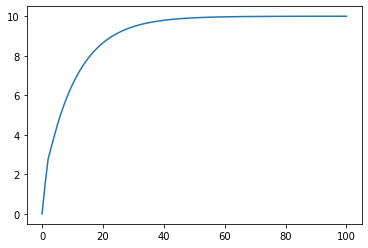

In [39]:
holonomic_actuation = np.matrix([[1]])

pid = PID(1,1,holonomic_actuation)
target = np.array([10])
s = np.array([0])
record = [s]

for i in range(100):
    s = pid.control(s, target=target)
    record.append(s)
    
plt.plot(np.arange(0,101), record)